# Introduction about data
To know which factor may affect the student's performance, we classify the score into couple of ranks, and figure out which feature affects the score more significant. The independent variables are follow:

* gender : sex of students
* race/ethnicity : ethnicity of students
* parental level of education : parents' final education
* lunch : having lunch before test (normal or abnormal)
* test preparation course : complete or not complete before test


## Import necessary library

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

## Import dataset

In [2]:
score_data = pd.read_csv('StudentsPerformance.csv')
score_data 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Initial Analysis

In [3]:
score_data.shape

(1000, 8)

In [4]:
score_data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
score_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
score_data[score_data.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [7]:
score_data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
score_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
score_data.rename(columns= {'race/ethnicity':'ethnicity',
                            'parental level of education':'parents_education',
                            'test preparation course':'course',
                            'math score':'math_score',
                            'reading score':'reading_score',
                            'writing score': 'writing_score'},inplace=True)

In [10]:
score_data.head()

,gender,ethnicity,parents_education,lunch,course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
score_data.gender.unique()

array(['female', 'male'], dtype=object)

In [12]:
score_data.ethnicity.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [13]:
score_data.parents_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [14]:
score_data.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [15]:
score_data.course.unique()

array(['none', 'completed'], dtype=object)

## Exploratory data analysis

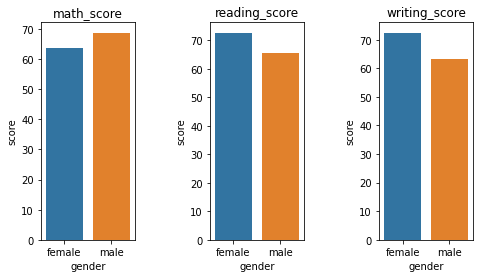

In [26]:
fig, ax = plt.subplots()
fig.subplots_adjust(left = 0.2,right=1.2,hspace=0.8,wspace=0.8)
for inx in range(3):
    plt.subplot(1,3,inx+1)
    gender_data = score_data.groupby("gender")[list(score_data.columns[-3:])[inx]].describe()
    sns.barplot(gender_data.index,y=gender_data.loc[:,'mean'].values)
    plt.ylabel('score')
    plt.title(list(score_data.columns[-3:])[inx])
plt.show()

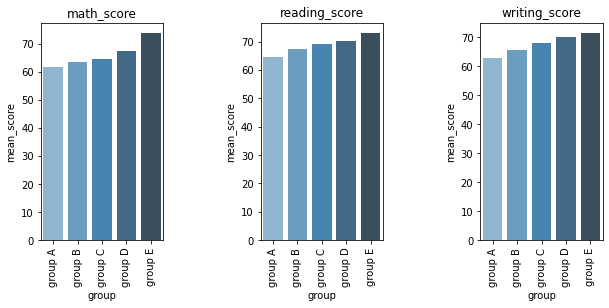

In [35]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2,right=1.5,wspace=0.8,hspace=0.8)
for idx in range(3):
    plt.subplot(1,3,idx+1)
    mean_data = score_data.groupby('ethnicity')[list(score_data.columns[-3:])[idx]].mean()
    sns.barplot(x = mean_data.index,y=mean_data.values,palette='Blues_d')
    plt.ylabel('mean_score')
    plt.xlabel('group')
    plt.xticks(rotation = 90)
    plt.title(list(score_data.columns[-3:])[idx])
plt.show()

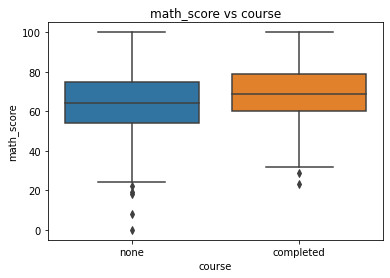

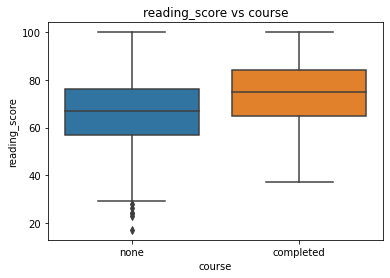

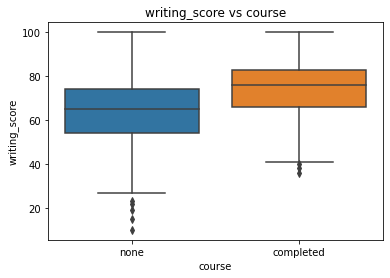

In [38]:
for item in score_data.columns[-3:]:
    sns.boxplot(x = score_data.course,y=score_data[item])
    plt.title(item+' vs course')
    plt.show()

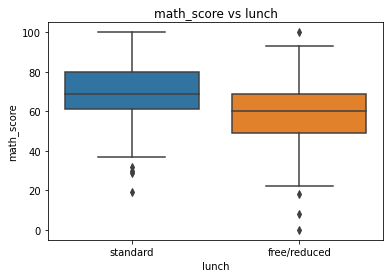

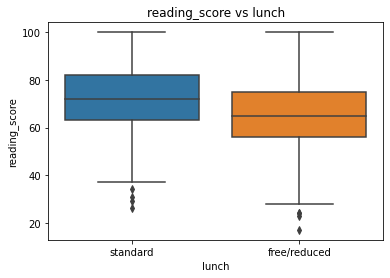

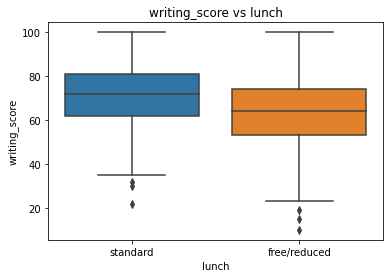

In [39]:
for item in score_data.columns[-3:]:
    sns.boxplot(x=score_data['lunch'],y=score_data[item])
    plt.title(item+' vs lunch')
    plt.show()

In [41]:
score_data.columns 

Index(['gender', 'ethnicity', 'parents_education', 'lunch', 'course',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

In [42]:
le = LabelEncoder()
score_data['parents_education'] = le.fit_transform(score_data['parents_education'])
score_data['lunch'] = le.fit_transform(score_data['lunch'])
score_data['course'] = le.fit_transform(score_data['course'])

In [43]:
score_data.head()

,gender,ethnicity,parents_education,lunch,course,math_score,reading_score,writing_score
0,female,group B,1,1,1,72,72,74
1,female,group C,4,1,0,69,90,88
2,female,group B,3,1,1,90,95,93
3,male,group A,0,0,1,47,57,44
4,male,group C,4,1,1,76,78,75


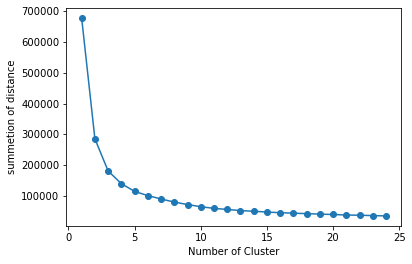

In [46]:
wcss = []
for item in range(1,25):
    kmean = KMeans(n_clusters=item)
    kmean.fit_transform(score_data.iloc[:,2:])
    wcss.append(kmean.inertia_)
plt.plot(range(1,25),wcss, marker = 'o')
plt.xlabel('Number of Cluster')
plt.ylabel('summetion of distance')
plt.show()

In [47]:
kmean_model = KMeans(n_clusters=5)
kmean_model.fit_transform(score_data.iloc[:,2:])
cluster = kmean_model.labels_
score_data['cluster'] = cluster
score_data 

,gender,ethnicity,parents_education,lunch,course,math_score,reading_score,writing_score,cluster
0,female,group B,1,1,1,72,72,74,1
1,female,group C,4,1,0,69,90,88,2
2,female,group B,3,1,1,90,95,93,2
3,male,group A,0,0,1,47,57,44,4
4,male,group C,4,1,1,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,3,1,0,88,99,95,2
996,male,group C,2,0,1,62,55,55,4
997,female,group C,2,0,0,59,71,65,3
998,female,group D,4,1,0,68,78,77,1


In [51]:
cluster_df = score_data.groupby('cluster')[score_data.columns[-4:-1]].mean()
cluster_df 

,math_score,reading_score,writing_score
cluster,,,
0,35.982456,39.280702,36.929825
1,73.726937,77.250923,76.166052
2,85.946429,89.577381,89.047619
3,63.556338,66.588028,66.000000
4,52.586364,54.704545,52.745455


In [49]:
score_data[score_data.cluster == 1]

,gender,ethnicity,parents_education,lunch,course,math_score,reading_score,writing_score,cluster
0,female,group B,1,1,1,72,72,74,1
4,male,group C,4,1,1,76,78,75,1
5,female,group B,0,1,1,71,83,78,1
12,female,group B,2,1,1,65,81,73,1
13,male,group A,4,1,0,78,72,70,1
...,...,...,...,...,...,...,...,...,...
987,male,group E,5,1,0,81,75,76,1
989,female,group D,4,0,0,67,86,83,1
990,male,group E,2,0,0,86,81,75,1
991,female,group B,5,1,0,65,82,78,1


In [52]:
score_data[score_data.cluster == 0]

,gender,ethnicity,parents_education,lunch,course,math_score,reading_score,writing_score,cluster
7,male,group B,4,0,1,40,43,39,0
11,male,group D,0,1,1,40,52,43,0
17,female,group B,5,0,1,18,32,28,0
18,male,group C,3,0,0,46,42,46,0
33,male,group D,4,1,1,40,42,38,0
55,female,group C,2,0,1,33,41,43,0
59,female,group C,5,0,1,0,17,10,0
61,male,group A,5,0,1,39,39,34,0
66,male,group D,5,0,1,45,37,37,0
75,male,group B,0,0,1,44,41,38,0


In [53]:
score_data[score_data.cluster == 2]

,gender,ethnicity,parents_education,lunch,course,math_score,reading_score,writing_score,cluster
1,female,group C,4,1,0,69,90,88,2
2,female,group B,3,1,1,90,95,93,2
6,female,group B,4,1,0,88,95,92,2
16,male,group C,2,1,1,88,89,86,2
34,male,group E,4,1,1,97,87,82,2
...,...,...,...,...,...,...,...,...,...
979,female,group C,0,1,1,91,95,94,2
982,male,group B,5,1,0,79,85,86,2
983,female,group A,4,1,0,78,87,91,2
995,female,group E,3,1,0,88,99,95,2


In [54]:
score_data[score_data.cluster == 3]

,gender,ethnicity,parents_education,lunch,course,math_score,reading_score,writing_score,cluster
8,male,group D,2,0,0,64,64,67,3
20,male,group D,2,1,1,66,69,63,3
21,female,group B,4,0,0,65,75,70,3
27,female,group C,1,1,1,67,69,75,3
28,male,group C,2,1,1,70,70,65,3
...,...,...,...,...,...,...,...,...,...
977,male,group C,0,1,1,62,65,58,3
992,female,group D,0,0,1,55,76,76,3
993,female,group D,1,0,1,62,72,74,3
994,male,group A,2,1,1,63,63,62,3


In [55]:
score_data[score_data.cluster == 4]

,gender,ethnicity,parents_education,lunch,course,math_score,reading_score,writing_score,cluster
3,male,group A,0,0,1,47,57,44,4
9,female,group B,2,0,1,38,60,50,4
10,male,group C,0,1,1,58,54,52,4
14,female,group A,3,1,1,50,53,58,4
19,female,group C,0,0,1,54,58,61,4
...,...,...,...,...,...,...,...,...,...
973,female,group D,4,0,1,49,65,61,4
978,male,group D,2,1,0,55,41,48,4
985,male,group A,2,1,1,57,51,54,4
986,female,group C,0,1,1,40,59,51,4


## Conclusion
* test preparation course may affect the performance of student,it will be help full to get score
* lunch is the important factor.it is a significant factor for score.
* gender is not 